In [2]:
# load data from pycaret repo
import pandas as pd
import numpy as np


data = pd.read_csv('../data/6K_5R_HNR_set_clean.csv', sep=',') 

data['LeftSideFirst'] = data['LeftSideFirst'].apply(lambda value: ''.join(i for i in str(value) if i.isdigit()))
data['LeftSideLast'] = data['LeftSideLast'].apply(lambda value: ''.join(i for i in str(value) if i.isdigit()))
data['RightSideFirst'] = data['RightSideFirst'].apply(lambda value: ''.join(i for i in str(value) if i.isdigit()))
data['RightSideLast'] = data['RightSideLast'].apply(lambda value: ''.join(i for i in str(value) if i.isdigit()))
data = data.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)
# data.to_csv('../data/set_clean.csv', index=False)
# 'LeftSideIntermediate':'float', 
# 'LeftSideInterpolation':'float',
# 'RightSideIntermediate':'float',
# 'RightSideInterpolation':'float',
data = data.astype({'LeftSideFirst':'float', 'LeftSideLast':'float',  'RightSideFirst':'float',  'RightSideLast':'float', 'Length':'float'})
data = data.drop(columns=['txId', 'FeatureID'])
# data = data.astype({'LeftSieFirst':'float','LeftSieLst':'float', 'RightSieFirst':'float', 'RightSieLst':'float', 'Length':'float'})
data.loc[data["ViolatedRule"] == 50901, "ViolatedRule"] = 1
data.loc[data["ViolatedRule"] == -1, "ViolatedRule"] = 0
# data['left_diff'] = data['LeftSieFirst'] - data['LeftSieLst']
# data['right_diff'] = data['RightSieFirst'] - data['RightSieLst']
# data['left_dens'] = data['left_diff'] / data['Length']
# data['right_dens'] = data['right_diff'] / data['Length']

data

,HouseNumberVariance,LeftSideFirst,LeftSideIntermediate,LeftSideLast,LeftSideInterpolation,RightSideFirst,RightSideIntermediate,RightSideLast,RightSideInterpolation,Length,ViolatedRule
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080.520708,0
1,Odd,1.0,NaN,11.0,NotInterpolated,NaN,NaN,NaN,NaN,5162.195076,0
2,Irregular,13.0,6,15.0,NotInterpolated,NaN,NaN,NaN,NaN,2873.861514,0
3,Irregular,21.0,25;27,31.0,NotInterpolated,2.0,4;8,10.0,NotInterpolated,3154.254270,0
4,Even,NaN,NaN,NaN,NaN,17.0,NaN,16.0,NotInterpolated,410.329136,0
...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.917821,0
1024,Even,NaN,NaN,NaN,NaN,100.0,NaN,100.0,NotInterpolated,900.790764,0
1025,Even,22.0,NaN,23.0,NotInterpolated,14.0,NaN,14.0,NotInterpolated,5858.640457,0
1026,Odd,17.0,NaN,17.0,NotInterpolated,NaN,NaN,NaN,NaN,24343.695370,0


In [3]:

# data['left_diff'] = data['LeftSideFirst'] - data['LeftSideLast']
# data['right_diff'] = data['RightSideFirst'] - data['RightSideLast']
# data['left_dens'] = data['left_diff'] / data['Length']
# data['right_dens'] = data['right_diff'] / data['Length']


#data['ViolatedRule'] = data['ViolatedRule']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HouseNumberVariance     837 non-null    object 
 1   LeftSideFirst           637 non-null    float64
 2   LeftSideIntermediate    89 non-null     object 
 3   LeftSideLast            637 non-null    float64
 4   LeftSideInterpolation   637 non-null    object 
 5   RightSideFirst          639 non-null    float64
 6   RightSideIntermediate   87 non-null     object 
 7   RightSideLast           639 non-null    float64
 8   RightSideInterpolation  639 non-null    object 
 9   Length                  1028 non-null   float64
 10  ViolatedRule            1028 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 88.5+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LeftSideFirst,637.0,402518.406593,5.693324e+06,1.000000,11.000000,35.000000,230.00000,9.819107e+07
LeftSideLast,637.0,375887.144427,5.686946e+06,1.000000,14.000000,37.000000,255.00000,9.819107e+07
RightSideFirst,639.0,102357.406886,2.064219e+06,1.000000,13.000000,39.000000,229.50000,5.102510e+07
RightSideLast,639.0,103011.154930,2.064215e+06,1.000000,15.000000,40.000000,230.00000,5.102510e+07
Length,1028.0,8800.727466,1.192672e+04,397.997487,2892.445576,5612.765941,10244.80325,1.474675e+05
ViolatedRule,1028.0,0.053502,2.251417e-01,0.000000,0.000000,0.000000,0.00000,1.000000e+00


In [6]:
data.ViolatedRule.value_counts()

0    973
1     55
Name: ViolatedRule, dtype: int64

In [7]:
import sweetviz as sv
# from pandas_profiling import ProfileReport
config = sv.FeatureConfig( force_num=['ViolatedRule']) # skip=["proline", "magnesium"],
my_report = sv.analyze(data,feat_cfg=config,target_feat ='ViolatedRule')
my_report.show_html()
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file(output_file=pathlib.Path("./data_report.html"))
#profile.to_widgets()

/usr/local/lib/python3.8/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.8/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].ite

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
#from pycaret.classification import *
from pycaret.classification import *
s = setup(data, target = 'ViolatedRule', silent = True, log_experiment = True, experiment_name = 'first_rule', fix_imbalance=True)
#feature_interaction = True, feature_ratio = True,          fix_imbalance=True

,Description,Value
0,session_id,8287
1,Target,ViolatedRule
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1028, 11)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# compare baseline models
best = compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9680,0.9225,0.6650,0.7975,0.7063,0.6899,0.7034,0.0690
xgboost,Extreme Gradient Boosting,0.9666,0.9528,0.7150,0.7183,0.7108,0.6932,0.6964,0.1040
rf,Random Forest Classifier,0.9652,0.9620,0.6400,0.7467,0.6798,0.6617,0.6688,0.0800
catboost,CatBoost Classifier,0.9638,0.9619,0.7650,0.6812,0.7181,0.6990,0.7017,3.8580
lightgbm,Light Gradient Boosting Machine,0.9611,0.9505,0.6400,0.7071,0.6574,0.6371,0.6457,0.1260
dt,Decision Tree Classifier,0.9597,0.8289,0.6800,0.6650,0.6633,0.6422,0.6472,0.0110
knn,K Neighbors Classifier,0.9583,0.9289,0.8400,0.6221,0.7040,0.6825,0.6975,0.3150
gbc,Gradient Boosting Classifier,0.9583,0.9632,0.7150,0.6371,0.6693,0.6472,0.6510,0.0510
ada,Ada Boost Classifier,0.9416,0.9078,0.7200,0.5309,0.5957,0.5660,0.5821,0.0330
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'AUC')

IntProgress(value=0, description='Processing: ', max=84)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:44:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9680,0.9225,0.6650,0.7975,0.7063,0.6899,0.7034,0.0810
xgboost,Extreme Gradient Boosting,0.9666,0.9528,0.7150,0.7183,0.7108,0.6932,0.6964,0.1190
rf,Random Forest Classifier,0.9652,0.9620,0.6400,0.7467,0.6798,0.6617,0.6688,0.1120
lightgbm,Light Gradient Boosting Machine,0.9611,0.9505,0.6400,0.7071,0.6574,0.6371,0.6457,0.1070
dt,Decision Tree Classifier,0.9597,0.8289,0.6800,0.6650,0.6633,0.6422,0.6472,0.0170
knn,K Neighbors Classifier,0.9583,0.9289,0.8400,0.6221,0.7040,0.6825,0.6975,0.0280
gbc,Gradient Boosting Classifier,0.9583,0.9632,0.7150,0.6371,0.6693,0.6472,0.6510,0.0540
ada,Ada Boost Classifier,0.9416,0.9078,0.7200,0.5309,0.5957,0.5660,0.5821,0.0380
ridge,Ridge Classifier,0.7316,0.0000,0.9300,0.1788,0.2985,0.2204,0.3338,0.0150
lda,Linear Discriminant Analysis,0.7177,0.8812,0.9300,0.1728,0.2897,0.2101,0.3238,0.0120


/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was dep

In [ ]:
investigated = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.8647,0.6667,0.4000,0.5000,0.4725,0.4899
1,0.9861,0.9952,1.0000,0.7500,0.8571,0.8500,0.8597
2,0.9722,0.8406,0.3333,1.0000,0.5000,0.4894,0.5692
3,0.9722,0.9034,0.3333,1.0000,0.5000,0.4894,0.5692
4,0.9444,0.8750,0.5000,0.5000,0.5000,0.4706,0.4706
5,0.9583,0.9081,0.7500,0.6000,0.6667,0.6447,0.6493
6,0.9861,1.0000,1.0000,0.8000,0.8889,0.8816,0.8878
7,0.9722,0.8125,0.5000,1.0000,0.6667,0.6538,0.6969
8,0.9444,0.9853,0.7500,0.5000,0.6000,0.5714,0.5850


In [ ]:
print(investigated)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


In [ ]:
tuned_investigated = tune_model(investigated, choose_better=True, n_iter = 10, search_library = 'optuna', search_algorithm = 'tpe')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.7971,0.6667,0.2222,0.3333,0.2889,0.3415
1,0.9861,0.9952,1.0000,0.7500,0.8571,0.8500,0.8597
2,0.9722,0.8889,0.3333,1.0000,0.5000,0.4894,0.5692
3,0.9722,0.8647,0.3333,1.0000,0.5000,0.4894,0.5692
4,0.9444,0.9522,0.5000,0.5000,0.5000,0.4706,0.4706
5,0.9306,0.9081,0.7500,0.4286,0.5455,0.5109,0.5344
6,0.9861,1.0000,1.0000,0.8000,0.8889,0.8816,0.8878
7,0.9583,0.8934,0.5000,0.6667,0.5714,0.5500,0.5563
8,0.9167,0.9816,0.7500,0.3750,0.5000,0.4600,0.4931


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


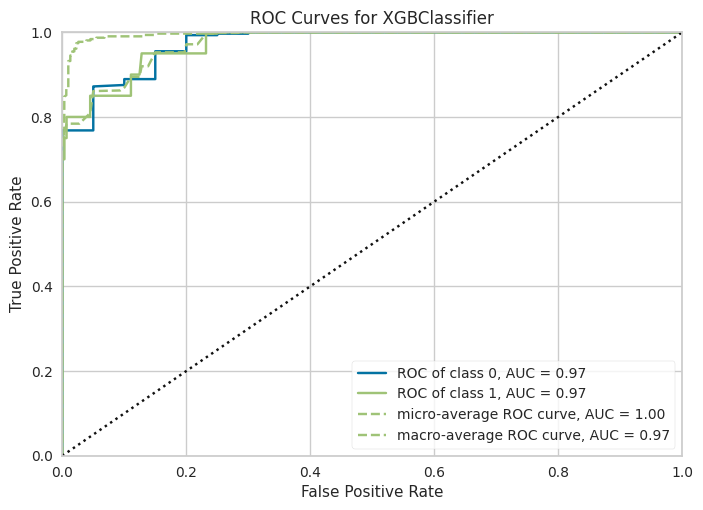

In [ ]:
plot_model(investigated, plot = 'auc')

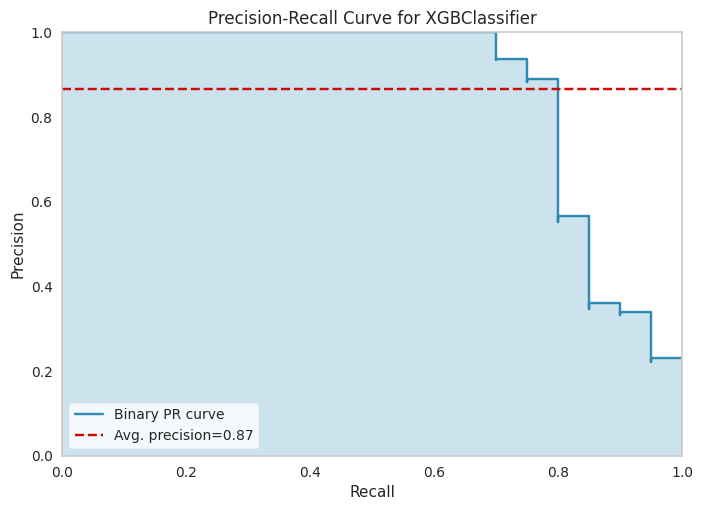

In [ ]:
plot_model(tuned_investigated, plot = 'pr')

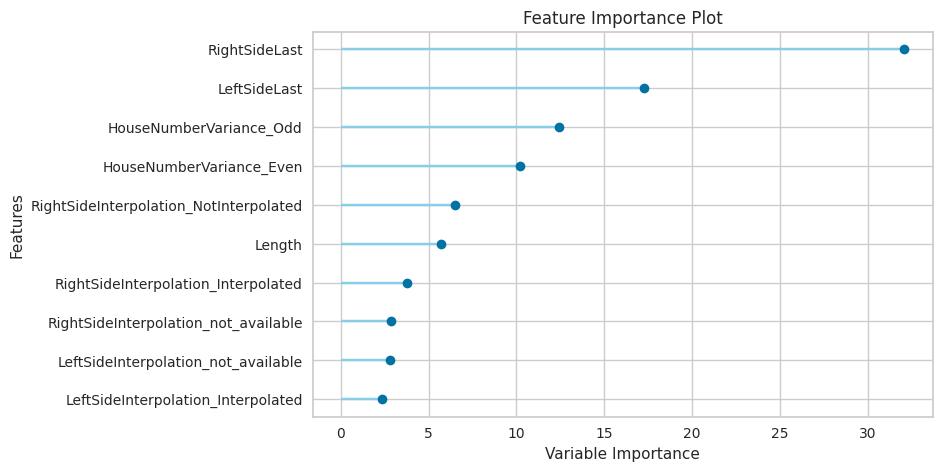

In [ ]:
plot_model(best_auc_model, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


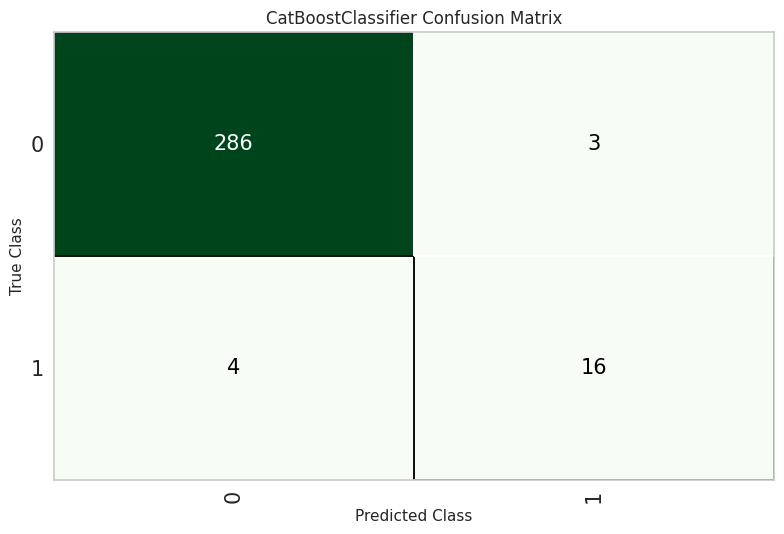

In [ ]:
plot_model(best_auc_model, plot = 'confusion_matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


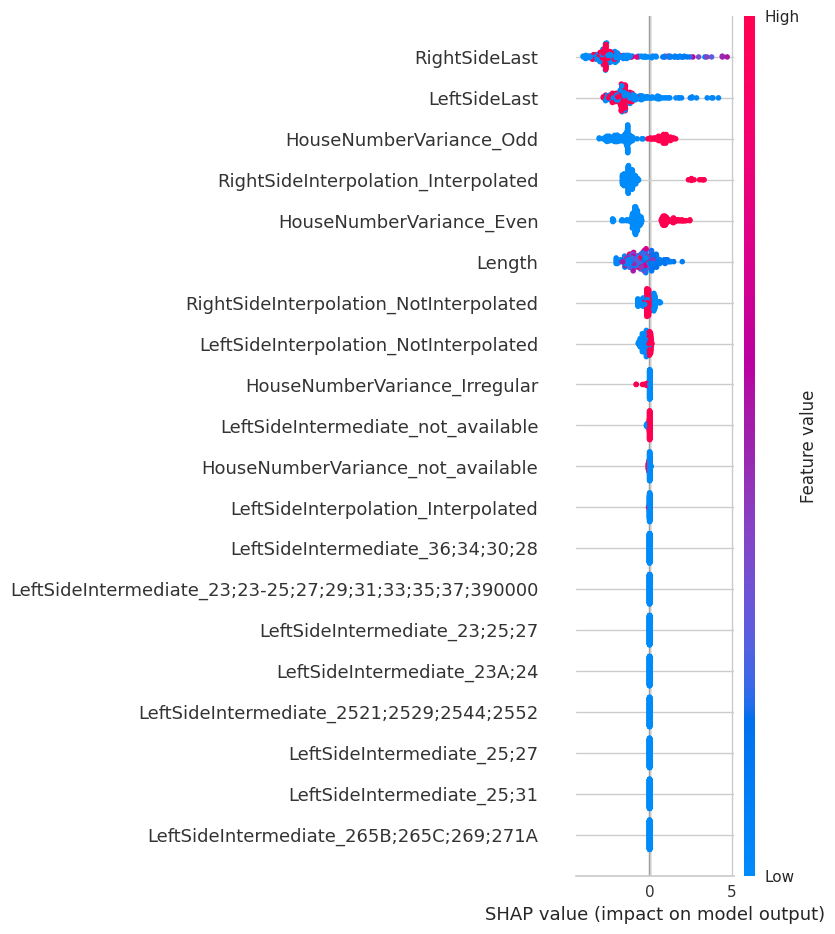

In [ ]:
interpret_model(tuned_investigated)

In [ ]:
evaluate_model(tuned_investigated)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_investigated)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9741,0.9738,0.8000,0.8000,0.8000,0.7862,0.7862


,LeftSideLast,RightSideLast,Length,HouseNumberVariance_Alphabetic,HouseNumberVariance_Even,HouseNumberVariance_Irregular,HouseNumberVariance_NumericMixed,HouseNumberVariance_Odd,HouseNumberVariance_not_available,LeftSideIntermediate_1-5,...,RightSideIntermediate_63;510,RightSideIntermediate_6A,RightSideIntermediate_82,RightSideIntermediate_not_available,RightSideInterpolation_Interpolated,RightSideInterpolation_NotInterpolated,RightSideInterpolation_not_available,ViolatedRule,Label,Score
0,518968.90625,27.000000,21336.757812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9999
1,518968.90625,118.000000,2129.088867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9986
2,518968.90625,34.000000,1553.221436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9999
3,4042.00000,31932.806641,7220.386230,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0.8264
4,518968.90625,31932.806641,69796.515625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,518968.90625,321.000000,3945.820801,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9493
305,9.00000,31932.806641,6536.977539,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9999
306,125.00000,212.000000,3327.561523,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9970
307,900.00000,31932.806641,2216.219482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0.9975


In [ ]:
final_rf = finalize_model(tuned_investigated)

15595.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
15595.82s - pydevd: Sending message rela